<a href="https://www.kaggle.com/code/fayez7/no-app?scriptVersionId=121917210" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/noshowappointments/KaggleV2-May-2016.csv


# Introduction

Hello!

A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?

So with this data I **Investigate** to answer the following Questions



# Questions
In this notebook, I ask 3 questions

1. Is receiving an SMS affect attendance at the medical appointment?
1. Is age a key factor in attendance at medical appointments?
1. Is the availability of scholarship important for attendance at medical appointments?

# Data Wrangling

***Before*** analysing data we need to make sure that it is clean

So we Start cleansing data by donig many steps:

**First**: check for messing values

In [2]:
# load the csv file into a pandas dataframe
df = pd.read_csv('/kaggle/input/noshowappointments/KaggleV2-May-2016.csv')

# check for empty cells in the dataframe
if df.isnull().values.any():
    print("There are empty cells in the dataframe")
else:
    print("There are no empty cells in the dataframe")

There are no empty cells in the dataframe


**Second**: check for duplicates

In [3]:
# check for duplicates in the "PatientId" column
duplicates = df[df.duplicated(['PatientId'])]

if duplicates.empty:
    print("There are no duplicates in the PatientId")
else:
    print(f"There are {len(duplicates)} duplicates in the PatientId")

    # remove duplicates and keep the first occurrence
    df.drop_duplicates(subset=['PatientId'], keep='first', inplace=True)
    print(f"Removed {len(duplicates) - len(df)} duplicates")
    

There are 48228 duplicates in the PatientId
Removed -14071 duplicates


**Third**: check for invalid values

In [4]:
# Check for invalid values in the "Gender" column
invalid_values = df[~df['Gender'].isin(['M', 'F'])]

# If there are invalid values, remove them
if len(invalid_values) > 0:
    df = df[df['Gender'].isin(['M', 'F'])]
    print(f"{len(invalid_values)} invalid values found in Gender and removed.")
else:
    print("No invalid values found in Gender.")
    
    
# Check for any values other than 0 or 1 in the specified columns
cols = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
for col in cols:
    if df[col].isin([0, 1]).sum() != len(df):
        # If any values other than 0 or 1 are found, delete them and remain only 0 or 1 values
        df = df.loc[df[col].isin([0, 1])]
        
# Loop through the columns and double check for values other than 0 or 1
for col in cols:
    unique_values = df[col].unique()
    invalid_values = [value for value in unique_values if value not in [0, 1]]
    if len(invalid_values) > 0:
        print(f"Column '{col}' contains invalid values: {invalid_values}")
    else:
        print(f"No invalid values found in column '{col}'")
        
        

# Check for values other than "No" or "Yes" in the "No-show" column
unique_values = df['No-show'].unique()
invalid_values = [value for value in unique_values if value not in ['No', 'Yes']]
if len(invalid_values) > 0:
    print(f"The 'No-show' column contains invalid values: {invalid_values}")
else:
    print("No invalid values found in the 'No-show' column")


No invalid values found in Gender.
No invalid values found in column 'Scholarship'
No invalid values found in column 'Hipertension'
No invalid values found in column 'Diabetes'
No invalid values found in column 'Alcoholism'
No invalid values found in column 'Handcap'
No invalid values found in the 'No-show' column


**Fourth**: check for logic in values

In [5]:
# Check for any negative values in the "Age" column
if (df['Age'] < 0).sum() > 0:
    # If any negative values are found, delete them and remain only positive values as integer numbers
    df = df.loc[df['Age'] >= 0]
    df['Age'] = df['Age'].astype(int)
    
    
# double Check for negative values in the "Age" column
invalid_values = df[df['Age'] < 0]

# If there are negative values, print a message
if len(invalid_values) > 0:
    print(f"{len(invalid_values)} negative values found.")
else:
    print("All values are Positive int.")

All values are Positive int.


# Exploratory Data Analysis

**After** Cleansing data, Now it’s time to **know** some facts about it such as :

* The percentage of not shown 
* The ratio between Males and Females
* The distribution of age

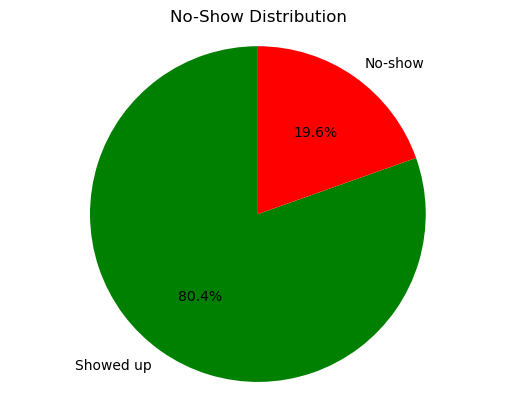

In [6]:
# Group the data by No-show
noshow_counts = df.groupby('No-show').size()

# Create a pie chart
labels = ['Showed up', 'No-show']
colors = ['green', 'red']
plt.pie(noshow_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('No-Show Distribution')
plt.show()

A pie chart with 35.7% for males and 64.3% for females is a visual representation of the gender distribution.
The 35.7% slice of the pie represents the proportion of males in the population, while the remaining part of the pie represents the proportion of females.

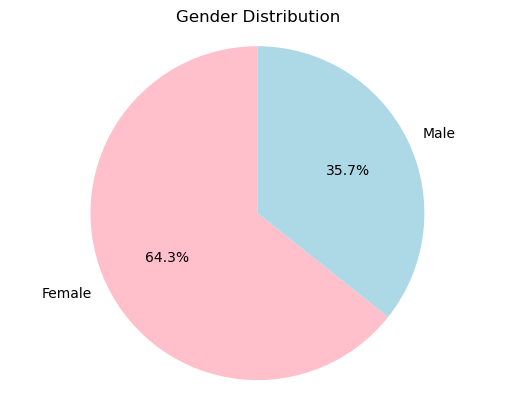

In [7]:
# Group the data by Gender
gender_counts = df.groupby('Gender').size()

# Create a pie chart
labels = ['Female', 'Male']
colors = ['pink', 'lightblue']
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Gender Distribution')
plt.show()

The pie chart with 80.4% showing up at their medical appointment and 19.6% no-shows is a visual representation of the attendance rate for medical appointments. The 80.4% slice of the pie represents the proportion of patients who attended their appointments, while the 19.6% slice represents the proportion of patients who did not show up for their appointments.

This type of pie chart is often used by healthcare providers to track patient attendance rates and identify potential issues with appointment scheduling or patient communication. It can also be used to evaluate the effectiveness of appointment reminders or other strategies to reduce no-show rates.

Overall, the pie chart provides a clear and easy-to-understand visual representation of attendance rates for medical appointments, which can be useful for healthcare providers and patients alike.

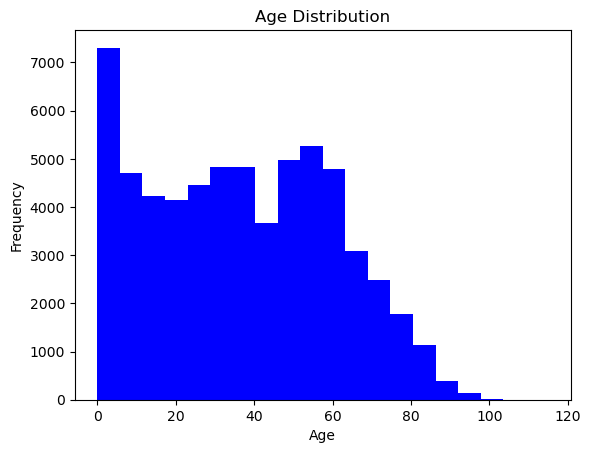

In [8]:
# Create a histogram
plt.hist(df['Age'], bins=20, color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


The age distribution is a strong right-skewed histogram, that's means that the most of patients are younger generations.

These were some insights to test different types of variables and exclude most of the similarities in code

And in the relationships I apply the same method, testing three different relationships with the main question of the possible reasons for patients do not show up at their medical appointment

In the next part, I ask 3 questions :

1. Is receiving an SMS affect attendance at the medical appointment?
1. Is age a key factor in attendance at medical appointments?
1. Is the availability of scholarship important for attendance at medical appointments?

# Now it’s time to find some relationships in data such as :

* The relationship between receiving a message and not shown in appointment
* The relationship between Age and not shown in appointment
* The relationship between scholarship and not shown in appointment

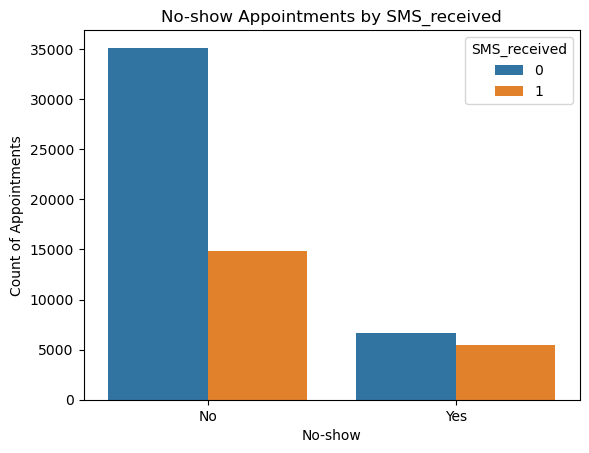

In [9]:
# Create a countplot to visualize the relationship between No-show and SMS_received
sns.countplot(x='No-show', hue='SMS_received', data=df)
plt.title('No-show Appointments by SMS_received')
plt.xlabel('No-show')
plt.ylabel('Count of Appointments')
plt.show()

This graph showed us that the ratio between receiving an SMS and not receiving an SMS is almost the same for patients who don't show up.
And many patients showed up even though they don't receive an SMS.

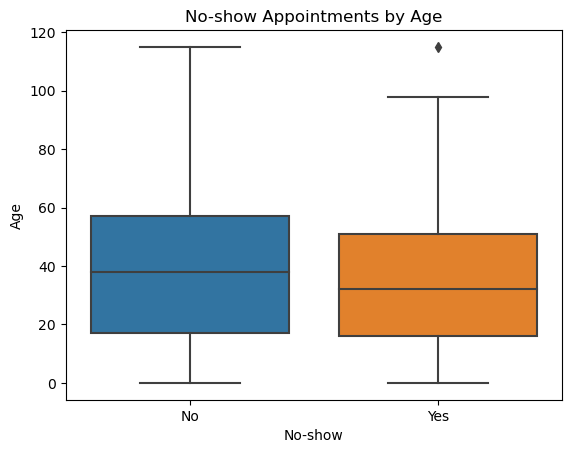

In [10]:
# Create a boxplot to visualize the relationship between No-show and Age
sns.boxplot(x='No-show', y='Age', data=df)
plt.title('No-show Appointments by Age')
plt.xlabel('No-show')
plt.ylabel('Age')
plt.show()

From this box plot, we can know that, most patients us young in case the patient attend or not.

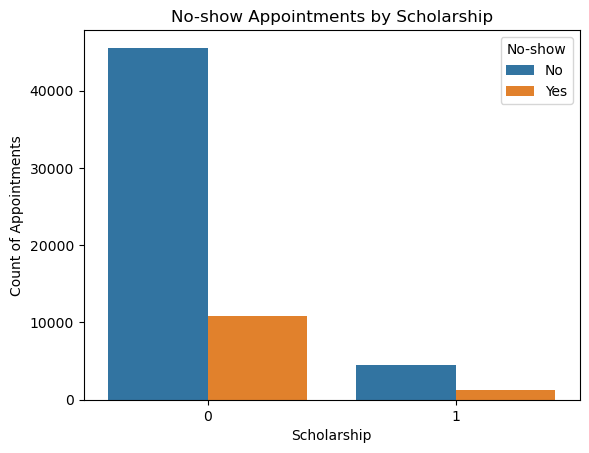

In [11]:
# Create a countplot to visualize the relationship between Scholarship and No-show
sns.countplot(x='Scholarship', hue='No-show', data=df)
plt.title('No-show Appointments by Scholarship')
plt.xlabel('Scholarship')
plt.ylabel('Count of Appointments')
plt.show()

According to this graph, most patients don't have a scholarship, but the ratio between showing up and not showing up in case the patient has a scholarship tells us that the scholarship has an effect on showing up, even if it's not a big one.

# Conclusion

from previous graphs we can know that:

* The first pie chart suggests that females make up a majority of the population, while males represent a smaller proportion. It’s logical insight because females have more interest in their health, so it’s normal to find that the most of data are from females.

* The second pie chart suggests that the majority of patients are attending their medical appointments, but there is still a significant percentage of patients who are not showing up. This could have negative implications for both the patient's health and the healthcare provider's operations, as missed appointments can lead to delays in care and increased costs.

* The positive skewness histogram showed that most of the patients are young, and the number of patients keeps decreasing for patients with high age.

* More than twice the patients who showed up don't receive an SMS, so receiving an SMS isn't important to attend the medical appointment.

* The age is not an important factor for showing up in the medical appointment.

* Although there are patients not showing up and have a scholarship, but if we comparing between having scholarship and not having it, we will find that  the ratio between showing up and not showing up in case the patient has a scholarship tells us that the scholarship has an effect on showing up, even if it's not a big one.



# Limitation

There is some Limitations, most of them I can handled like duplicated values and negative age, those Limitation and others solve in cleansing and Wrangling

But there is one Limitation I can’t solve, thats there is no location for the medical center, so the column of neighborhood is useless because I can’t calculate the distance between the medical center and the place of living for patients.